In [1]:
pip install torch torchvision

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
# Define transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
# Load CIFAR-10 Dataset
batch_size = 32
# Use CIFAR10 instead of CIFAR
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# Use CIFAR10 instead of CIFAR
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False,num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:04<00:00, 40.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


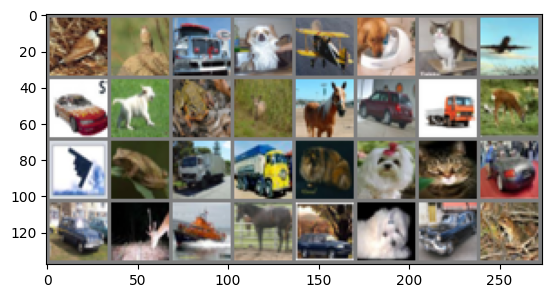

bird bird truck dog plane dog cat plane car dog frog deer horse car truck deer plane frog truck truck cat dog cat car car deer ship horse car dog car frog


In [9]:
import numpy as np

# Visualize some training images
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))



In [14]:
# Define the CNN Model
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x))) # Changed covn2 to conv2
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [15]:
# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [19]:
# Train the Network
print("Sarting Training...")
for epoch in range(30):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # Get the inputs: data is a list of [inputs, labels]
    inputs, labels = data

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Print statistics
    running_loss += loss.item()
    if i % 100 == 99:
      print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
      running_loss = 0.0

  print('Finshed Training')

print("Finished Training")



Sarting Training...
[Epoch 1, Batch 100] loss: 1.079
[Epoch 1, Batch 200] loss: 1.070
[Epoch 1, Batch 300] loss: 1.072
[Epoch 1, Batch 400] loss: 1.077
[Epoch 1, Batch 500] loss: 1.054
[Epoch 1, Batch 600] loss: 1.054
[Epoch 1, Batch 700] loss: 1.063
[Epoch 1, Batch 800] loss: 1.052
[Epoch 1, Batch 900] loss: 1.082
[Epoch 1, Batch 1000] loss: 1.041
[Epoch 1, Batch 1100] loss: 1.050
[Epoch 1, Batch 1200] loss: 1.027
[Epoch 1, Batch 1300] loss: 1.066
[Epoch 1, Batch 1400] loss: 1.068
[Epoch 1, Batch 1500] loss: 1.055
Finshed Training
[Epoch 2, Batch 100] loss: 1.023
[Epoch 2, Batch 200] loss: 1.051
[Epoch 2, Batch 300] loss: 1.025
[Epoch 2, Batch 400] loss: 1.017
[Epoch 2, Batch 500] loss: 1.011
[Epoch 2, Batch 600] loss: 0.984
[Epoch 2, Batch 700] loss: 1.016
[Epoch 2, Batch 800] loss: 1.046
[Epoch 2, Batch 900] loss: 1.029
[Epoch 2, Batch 1000] loss: 1.016
[Epoch 2, Batch 1100] loss: 1.009
[Epoch 2, Batch 1200] loss: 1.030
[Epoch 2, Batch 1300] loss: 1.022
[Epoch 2, Batch 1400] loss: 1

In [20]:
# Save the Trained Model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [21]:
# Test the Network
net.load_state_dict(torch.load(PATH))
net.eval()

correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on test images: {100 * correct / total:.2f}%')

<ipython-input-21-6b74a875d18e>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


Accuracy of the network on test images: 64.65%


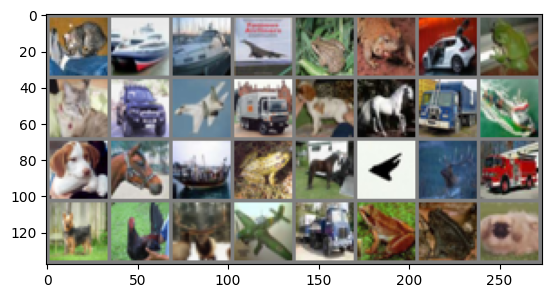

GroundTruth: cat ship ship plane frog frog car frog cat car plane truck dog horse truck ship dog horse ship frog horse plane deer truck dog bird deer plane truck frog frog dog
Predicted: cat car ship plane frog frog car deer cat car plane truck dog horse truck ship dog dog ship frog truck bird deer truck deer bird deer deer car frog cat cat


In [22]:
# Visualize Predictions
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth:', ' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted:', ' '.join(f'{classes[predicted[j]]}' for j in range(batch_size)))